In [27]:
from scipy.optimize import curve_fit
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

T=10000 #400 sec

dt=0.01
def f(l):
    return l[0]
#排序用的function 可不管

def prob(x):
    a=random.randint(1,10)
    if a<=x*10:
        return True
    else:
        return False
    # x的機率是true 1-x的機率是False
    


def normal(avg,var,c): #從Gaussian亂數抽樣 (抽出來一定大於零) 
   
    a=np.ndarray.tolist(np.random.normal(avg,var,3000)) #a是一個有normal分布的list
    
    a=list(filter(lambda x:x>c,a)) #濾掉小於等於c的
    
    s=random.sample(a,1) #從a裡面抽一個出來
    return s[0] #取出亂數



def ini(V_max,avg_d,avg_t,l): #初始化道路的程式 
    S=[] #儲存初始state  [0]位置  [1]速度 [2]安全距離 [3]延遲時間
 
    
    rad_x=random.sample(range(l),3)
    
    
    for i in range(3):
        #S.append([rad_x[i],random.uniform(0,V_max),normal(avg_d,0.3*avg_d,0),normal(avg_t,0.1*avg_t,1)])
        S.append([rad_x[i],random.uniform(0,V_max),avg_d,avg_t])
    
    S.sort(key=f)
    print(S)
    
    return S
    
    

def avg(x): #用來算list平均用的
    c=0
    for i in x:
        
        c+=i
            
    return c/len(x)


def rule(V_max,dx,car): #與前車距離 判斷的指標   Car 車子的狀態vector
    dV=(V_max/2)*(np.tanh(dx-car[2])+np.tanh(car[2]))
    car[1]+=(1/car[3])*(dV-car[1])*dt
    if car[1]<0:
        car[1]=0
   
    
    
    
print("done")


done


[[2, 4.999235997666339, 1, 1], [8, 0.28905454499791705, 1, 1], [9, 1.4591409245256854, 1, 1]]


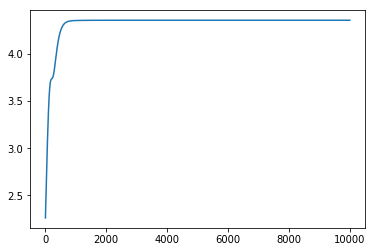

In [28]:
avgV=[] #個個時刻的平均速度

P=[] #所有時間所有狀態

t=[] #時間(長度和P一樣)
def traffic(V_max,avg_d,avg_t,l):
    #n是車子數量 V_max速度上限 d 安全距離
    S=ini(V_max,avg_d,avg_t,l)
    
    
    for j in range(T):
        
        V1=[]
        #每個時段內發生的事
       
        for i in range(len(S)):
            
            t.append(j) 
            P.append(S[i][0])
           
            
        #每台車的狀況
            if i==len(S)-1:
                dx=S[0][0]-(S[i][0]-l) #前後車距
                rule(V_max,dx,S[i])
                    
                
                if S[i][1]<0 or dx<=0: #debug用的
                            
                    print(S[i][0],S[i][1],j,i)
                    break
                
            if i<len(S)-1 : #最前面那台車的情形
                
                dx=S[i+1][0]-S[i][0]
                rule(V_max,dx,S[i])
                 
            
        
        for k in range(len(S)):
            S[k][0]+=S[k][1]*dt  #(4)更新車子的位置
                              
            V1.append(S[k][1])  #j時刻所有車的速度都丟進來
            
            
            if S[k][0]>l: 
                S[k][0]-=l
        S.sort(key=f)
               
         
        
        avgV.append(avg(V1)) #j時刻的平均速度
    return len(S)  #回傳車子的個數
avgV=[]        
P=[]
t=[]
a=traffic(5,1,1,10)
    #Vmax 安全距離 delay time  road length
plt.plot(avgV)

3
[[0, 1.4028588079021165, 1, 2], [1, 4.307794183824663, 1, 2], [2, 4.9664061850880445, 1, 2]]
4
[[0, 1.8664776091835673, 1, 2], [1, 0.5445266239284757, 1, 2], [3, 2.815829411510269, 1, 2]]
5
[[1, 3.0344895495797877, 1, 2], [2, 1.4772080839947799, 1, 2], [4, 3.8956787000845816, 1, 2]]
6
[[0, 4.325062839297232, 1, 2], [1, 1.6893850988855057, 1, 2], [4, 0.452696889874627, 1, 2]]
7
[[0, 2.1356181615243592, 1, 2], [5, 1.1466531179552426, 1, 2], [6, 1.8915730141351177, 1, 2]]
8
[[2, 0.135619605097535, 1, 2], [5, 1.2371459217975356, 1, 2], [7, 0.7952753405662399, 1, 2]]
9
[[1, 4.736230018123577, 1, 2], [4, 3.700130184836457, 1, 2], [7, 3.456392559866763, 1, 2]]
10
[[2, 0.9834739620474481, 1, 2], [5, 2.3274721284022744, 1, 2], [7, 0.28355786355092616, 1, 2]]
11
[[4, 2.9696168425280023, 1, 2], [6, 3.871304226219263, 1, 2], [9, 0.03180077731337827, 1, 2]]
12
[[1, 2.0670748486940074, 1, 2], [5, 3.0536369681177296, 1, 2], [9, 1.8883422014936873, 1, 2]]
13
[[7, 3.7578233633595977, 1, 2], [8, 4.128

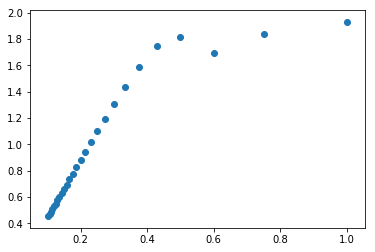

In [32]:
rho=[]
q=[]
for i in range(3,30,1):
    avgV=[] 
    P=[]
    t=[]
    print(i)
    traffic(5,1,2,i)
    v=avgV[9999] #取平衡之後的平均速度
    
    q.append(v*(3/i))
    rho.append(3/i)
plt.scatter(rho,q)

122
11.01
101
99
8
7
6
5.01
4.1
3
2.2
1.1
